In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
from matplotlib import pyplot
import sklearn
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.datasets import make_regression

In [3]:
#importo los csv que hemos tratado con getdummies
traindu =  pd.read_csv("OUTPUT/train_dum.csv")
preddu = pd.read_csv("OUTPUT/pred_dum.csv")

In [4]:
traindu.head()


,carat,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,4.29,4.31,2.70,605,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.34,4.46,4.49,2.80,565,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.40,4.70,4.75,2.85,720,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.40,4.72,4.74,2.92,793,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.90,6.10,6.13,3.73,4381,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [5]:
preddu.head()

,carat,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,2.36,8.68,8.57,5.24,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,2.04,8.18,8.23,5.09,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.51,5.18,5.19,3.20,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0.30,4.32,4.33,2.65,0,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
4,0.96,6.11,5.98,4.16,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [6]:
#la unica diferencia es que el preddu no tiene la columna de price, que es la que queremos predecir. 
#ahora trabajamos solo con traindu hasta que hagamos la predicicon final

In [7]:
Xd =traindu[['carat','x', 'y', 'z', 'cut_Fair', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_D', 'color_E', 'color_F',
       'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2']]
yd = traindu["price"]



In [8]:
X_traind, X_testd, y_traind, y_testd = train_test_split(Xd, yd, test_size=0.2)
# OJO. aboslutamente fundamental entender estas dos celdas. Es donde se establecen los parametros con los que 
#vamos a trabajar en los modelos.

# Nearest Neighbour

In [15]:
neighd = KNeighborsRegressor(n_neighbors=5, weights= "distance", p = 1)
neighd.fit(X_traind, y_traind)
y_predd = neighd.predict(X_testd)
print(mean_squared_error(y_testd, y_predd, squared = False))
#habra que mirar para que quiero estos dos datos. Por ahora seguimos
print(neighd.score(X_traind, y_traind))
print(neighd.score(X_testd, y_testd))



639.3772918945309
0.9999940495966262
0.9745393437169604


In [27]:
#639. No es del todo malo pero se puede mejorar muchisimo

# Random forrest regression model

In [16]:
regrd = RandomForestRegressor(max_depth=20, n_estimators=900)
regrd.fit(X_traind, y_traind)
y_predRFd = regrd.predict(X_testd)
#el ordenador tarda muuucho (2 o 3 min) en esto
print(mean_squared_error(y_testd, y_predRFd, squared = False))
print(regrd.score(X_traind, y_traind))
print(regrd.score(X_testd, y_testd))

553.84773803683
0.9967919654302484
0.980895487895013


In [34]:
#No esta nada mal


# Gradient boosting regressor

In [37]:
regd = GradientBoostingRegressor(n_estimators = 700, min_samples_split = 3, learning_rate = 0.2, )
regd.fit(X_traind, y_traind)
GBRd = regd.predict(X_testd)

In [39]:
print(mean_squared_error(y_testd, GBRd, squared = False))
train_score = regd.score(X_traind, y_traind)
print(train_score)
test_score = regd.score(X_testd, y_testd)
print(test_score)


576.815659125865
0.9869610334529169
0.9792781148580242


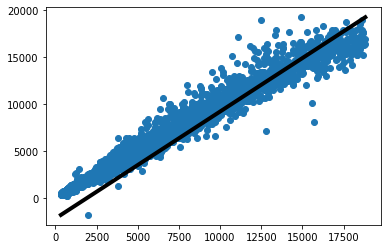

In [19]:
#regular
plt.pyplot.scatter(y_testd,GBRd)
plt.pyplot.plot([y_testd.min(), y_testd.max()], [GBRd.min(), GBRd.max()], 'k-', lw=4)

# Neural Network Regression

In [45]:
Neu_Ntwk= MLPRegressor(random_state=0, max_iter= 500, solver = "adam").fit(X_traind, y_traind)
y_predNtwk = Neu_Ntwk.predict(X_testd)
print(mean_squared_error(y_testd, y_predNtwk, squared = False))
print(Neu_Ntwk.score(X_traind, y_traind))
print(Neu_Ntwk.score(X_testd, y_testd))

613.0732184937884
0.9765536900261949
0.9765911613613714


/home/carlossanz/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#bastante malo. 

# Nos quedamos con el segundo de ellos. Random forrest regression. 553.


# Bagging Regressor

In [31]:
#no lo he conseguido. No se que le pasa.
from sklearn.ensemble import BaggingRegressor

In [32]:
reg = BaggingRegressor(n_estimators=14)

In [33]:
reg.fit(X_traind, y_traind)

BaggingRegressor(n_estimators=14)

In [34]:
y_pred_BR= reg.predict(X_testd)

In [35]:
y_test_BR = y_testd.copy()
y_test_BR['y']= y_pred_BR

In [36]:
y_test_BR['Price-y'] = abs(y_test_BR['price']- y_test_BR['y'])
y_test_BR.describe()

KeyError: 'price'